In [1]:
# Import necessary libraries
import pandas as pd

# Load parquet and csv files into DataFrames and print headers
df_p65 = pd.read_parquet('full_p65_with_nearest.parquet')
print("Headers for full_p65_with_nearest.parquet:")
print(df_p65.head())
print(df_p65.columns)

df_jcc = pd.read_csv('jcc_counts.csv')
print("\nHeaders for jcc_counts.csv:")
print(df_jcc.head())
print(df_jcc.columns)

Headers for full_p65_with_nearest.parquet:
  benchmark                        title  \
0         1       Division Director ‐ PX   
1         1       Division Director ‐ PX   
2         1       Division Director ‐ PX   
3         2  Division Operations Manager   
4         2  Division Operations Manager   

                                  group    code  \
0  Executives and Senior Administrators  PA0112   
1  Executives and Senior Administrators  PA0112   
2  Executives and Senior Administrators  PA0112   
3  Executives and Senior Administrators  PA0113   
4  Executives and Senior Administrators  PA0113   

                                        family  BU schedule  original_range  \
0  PA01 ‐ Executives and Senior Administrators  XE      N00            27.0   
1  PA01 ‐ Executives and Senior Administrators  XE      N00            27.0   
2  PA01 ‐ Executives and Senior Administrators  XE      N00            27.0   
3  PA01 ‐ Executives and Senior Administrators  SS      200          

In [2]:
# Group by 'code', find the index of max 'range_change' for each group, and select those rows
df_p65_filtered = df_p65.loc[df_p65.groupby('code')['range_change'].idxmax()]

print(df_p65_filtered.head())
print(df_p65_filtered.columns)

# Inner join df_jcc with df_p65_filtered on 'code' and 'JCC'
df_p65_filtered = pd.merge(df_p65_filtered, df_jcc[['JCC', 'Count']].rename(columns={'Count': 'headcount', 'JCC': 'code'}), on='code', how='left')

df_p65_filtered['headcount'] = df_p65_filtered['headcount'].fillna(0).astype(int)

df_p65_filtered.head()

   benchmark                        title  \
0          1       Division Director ‐ PX   
4          2  Division Operations Manager   
6          3           Office Assistant 1   
9          4                    Secretary   
12         5        Executive Secretary 3   

                                   group    code  \
0   Executives and Senior Administrators  PA0112   
4   Executives and Senior Administrators  PA0113   
6      Administrative and Office Support  PB0102   
9      Administrative and Office Support  PB0130   
12     Administrative and Office Support  PB0137   

                                         family  BU schedule  original_range  \
0   PA01 ‐ Executives and Senior Administrators  XE      N00            27.0   
4   PA01 ‐ Executives and Senior Administrators  SS      200            24.0   
6                 PB01 ‐ General Administration  GP      200             8.0   
9                 PB01 ‐ General Administration  XE      N00            11.0   
12              

,benchmark,title,group,code,family,BU,schedule,original_range,step,ak_annual_salary,market_target_annual_salary,percentile,nearest_range,range_change,headcount
0,1,Division Director ‐ PX,Executives and Senior Administrators,PA0112,PA01 ‐ Executives and Senior Administrators,XE,N00,27.0,A,117371,146594.0,65,30,3,78
1,2,Division Operations Manager,Executives and Senior Administrators,PA0113,PA01 ‐ Executives and Senior Administrators,SS,200,24.0,E,124654,129996.0,65,25,1,61
2,3,Office Assistant 1,Administrative and Office Support,PB0102,PB01 ‐ General Administration,GP,200,8.0,A,34983,43186.0,65,12,4,68
3,4,Secretary,Administrative and Office Support,PB0130,PB01 ‐ General Administration,XE,N00,11.0,A,43115,56890.0,65,15,4,0
4,5,Executive Secretary 3,Administrative and Office Support,PB0137,PB01 ‐ General Administration,XE,N00,16.0,A,59534,73930.0,65,19,3,11


In [3]:
# Get 25 rows with lowest headcount
lowest_headcount = df_p65_filtered.nsmallest(25, 'headcount')[['code', 'title', 'headcount', 'range_change']]
print("Lowest 25 headcounts:")
print(lowest_headcount)

# Get 25 rows with highest headcount
highest_headcount = df_p65_filtered.nlargest(25, 'headcount')[['code', 'title', 'headcount', 'range_change']]
print("\nHighest 25 headcounts:")
print(highest_headcount)

# Get 25 rows with highest range_change
highest_range_change = df_p65_filtered.nlargest(25, 'range_change')[['code', 'title', 'headcount', 'range_change']]
print("\nHighest 25 range changes:")
print(highest_range_change)

Lowest 25 headcounts:
       code                                              title  headcount  \
3    PB0130                                          Secretary          0   
21   PB0325                            Labor Relations Manager          0   
43   PB07A3                            Application Developer 3          0   
44   PB07B2                              IT Business Analyst 2          0   
45   PB07C2                     IT Client Support Specialist 2          0   
46   PB07D2                           Database Administrator 2          0   
47   PB07E1                            IT Support Technician 1          0   
48   PB07J2                               IT Project Manager 2          0   
49   PB07M1                                       IT Manager 1          0   
50   PB07N2        Network and Telecommunications Specialist 2          0   
51   PB07P1                   IT Policy and Planning Analyst 1          0   
52   PB07R1                       IT Architecture Spec

In [4]:
# Total count of job classes studied that have a 0 headcount
zero_headcount_count = (df_p65_filtered['headcount'] == 0).sum()
print(f"Total count of job classes studied with a 0 headcount: {zero_headcount_count}")

# Count of the job titles that need a three or more range increase
high_range_change_count = (df_p65_filtered['range_change'] >= 3).sum()
print(f"Count of job titles that need a three or more range increase: {high_range_change_count}")

# Weighted average range increase needed based on the headcount
weighted_average_range_increase = (df_p65_filtered['headcount'] * df_p65_filtered['range_change']).sum() / df_p65_filtered['headcount'].sum()
print(f"Weighted average range increase needed based on the headcount: {weighted_average_range_increase:.2f}")

Total count of job classes studied with a 0 headcount: 33
Count of job titles that need a three or more range increase: 104
Weighted average range increase needed based on the headcount: 1.49


In [5]:
# Count of the job titles and headcount that need a three or more range increase
high_range_change_count = df_p65_filtered[df_p65_filtered['range_change'] >= 3]
print(f"Count of job titles that need a three or more range increase: {high_range_change_count.shape[0]}")
print(f"Headcount of employees that need a three or more range increase: {high_range_change_count['headcount'].sum()}")

# Percentage of workforce that needs at least a 1 range increase
at_least_one_range_increase = df_p65_filtered[df_p65_filtered['range_change'] > 0]
percentage_at_least_one_range_increase = (at_least_one_range_increase['headcount'].sum() / df_p65_filtered['headcount'].sum()) * 100
print(f"Percentage of workforce that needs at least a 1 range increase: {percentage_at_least_one_range_increase:.2f}%")

# Percentage of workforce that needs at least a 2 range increase
at_least_two_range_increase = df_p65_filtered[df_p65_filtered['range_change'] >= 2]
percentage_at_least_two_range_increase = (at_least_two_range_increase['headcount'].sum() / df_p65_filtered['headcount'].sum()) * 100
print(f"Percentage of workforce that needs at least a 2 range increase: {percentage_at_least_two_range_increase:.2f}%")

# Number of employees that need at least a 3 range increase
at_least_three_range_increase = df_p65_filtered[df_p65_filtered['range_change'] >= 3]
employees_at_least_three_range_increase = at_least_three_range_increase['headcount'].sum()
print(f"Number of employees that need at least a 3 range increase: {employees_at_least_three_range_increase}")

# Number of employees that need at least a 4 range increase
at_least_four_range_increase = df_p65_filtered[df_p65_filtered['range_change'] >= 4]
employees_at_least_four_range_increase = at_least_four_range_increase['headcount'].sum()
print(f"Number of employees that need at least a 4 range increase: {employees_at_least_four_range_increase}")

Count of job titles that need a three or more range increase: 104
Headcount of employees that need a three or more range increase: 1500
Percentage of workforce that needs at least a 1 range increase: 73.21%
Percentage of workforce that needs at least a 2 range increase: 48.84%
Number of employees that need at least a 3 range increase: 1500
Number of employees that need at least a 4 range increase: 505


In [6]:
# Unweighted average range change by original range
unweighted_avg_range_change = df_p65_filtered.groupby('original_range')['range_change'].mean().sort_index()
print("Unweighted average range change by original range:")
print(unweighted_avg_range_change)

# Weighted average range change by original range
weighted_avg_range_change = (df_p65_filtered.groupby('original_range')[['headcount', 'range_change']].apply(lambda x: (x['headcount'] * x['range_change']).sum() / x['headcount'].sum())).sort_index()
print("\nWeighted average range change by original range:")
print(weighted_avg_range_change)

Unweighted average range change by original range:
original_range
8.0     4.000000
9.0     1.500000
10.0    2.000000
11.0    1.625000
12.0    2.142857
13.0    2.500000
14.0    1.000000
15.0    1.533333
16.0    2.226415
17.0    1.565217
18.0    2.333333
19.0    1.875000
20.0    1.250000
21.0    1.419355
22.0    1.333333
23.0    0.761905
24.0    2.000000
25.0    0.600000
26.0    1.000000
27.0    3.000000
28.0    2.000000
Name: range_change, dtype: float64

Weighted average range change by original range:
original_range
8.0     4.000000
9.0     1.916667
10.0    2.009346
11.0    1.744745
12.0    2.323120
13.0    2.250000
14.0    0.123953
15.0    0.723684
16.0    1.844952
17.0    1.233410
18.0    2.298507
19.0    2.000000
20.0    0.788845
21.0    0.930612
22.0    0.426710
23.0    0.380000
24.0    2.197324
25.0   -0.734375
26.0    1.107143
27.0    3.000000
28.0    2.000000
dtype: float64


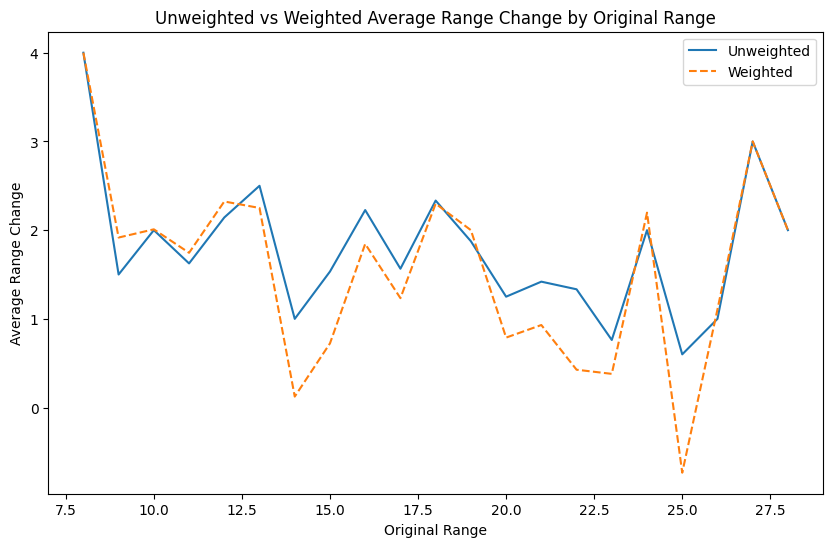

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
unweighted_avg_range_change.plot(kind='line')
weighted_avg_range_change.plot(kind='line', linestyle='--')
plt.xlabel('Original Range')
plt.ylabel('Average Range Change')
plt.title('Unweighted vs Weighted Average Range Change by Original Range')
plt.legend(['Unweighted', 'Weighted'])

plt.show()

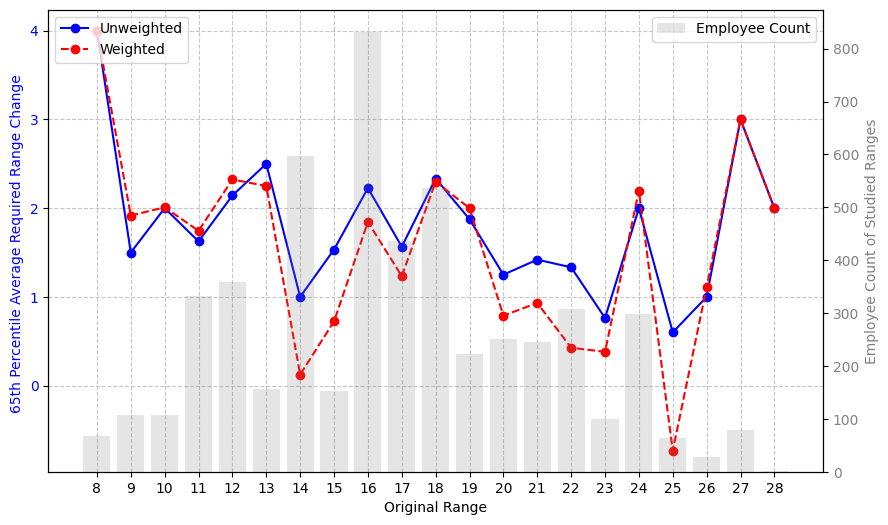

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming unweighted_avg_range_change and weighted_avg_range_change are pandas Series
# with index representing the original ranges (8, 9, ..., 28)
# and df_p65_filtered is a pandas DataFrame with 'original_range' column

# Define original ranges as categorical values
original_ranges = np.arange(8, 29)

counts = df_p65_filtered.groupby('original_range')['headcount'].sum()


# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot line graphs on left y-axis
ax1.plot(original_ranges, unweighted_avg_range_change.values, label='Unweighted', marker='o', color='blue')
ax1.plot(original_ranges, weighted_avg_range_change.values, label='Weighted', linestyle='--', marker='o', color='red')

# Set labels and title
ax1.set_xlabel('Original Range')
ax1.set_ylabel('65th Percentile Average Required Range Change ', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis on right
ax2 = ax1.twinx()

# Plot bar graph on right y-axis
ax2.bar(original_ranges, counts.values, alpha=0.2, color='gray', label='Employee Count')

# Set labels and tick parameters for secondary y-axis
ax2.set_ylabel('Employee Count of Studied Ranges', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Set x-axis ticks to integer values
ax1.set_xticks(original_ranges)

# Add grid for better readability (only on left y-axis)
ax1.grid(True, linestyle='--', alpha=0.7)

# Legend and show plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


In [9]:
# Unweighted correlation between original_range and range_change
unweighted_corr_coef = df_p65_filtered['original_range'].corr(df_p65_filtered['range_change'])
print(f"Unweighted correlation coefficient: {unweighted_corr_coef}")

# Weighted correlation between original_range and range_change
df_p65_filtered['weighted_original_range'] = df_p65_filtered['headcount'] * df_p65_filtered['original_range']
df_p65_filtered['weighted_range_change'] = df_p65_filtered['headcount'] * df_p65_filtered['range_change']
weighted_corr_coef = (df_p65_filtered['weighted_original_range'].sum() / df_p65_filtered['headcount'].sum()) / (df_p65_filtered['weighted_range_change'].sum() / df_p65_filtered['headcount'].sum())
print(f"Weighted correlation coefficient: {weighted_corr_coef}")

Unweighted correlation coefficient: -0.1408658033852
Weighted correlation coefficient: 11.273859448468675


In [10]:
import statsmodels.api as sm

# Unweighted linear regression
X_unweighted = df_p65_filtered[['original_range']]
y_unweighted = df_p65_filtered['range_change']
model_unweighted = sm.OLS(y_unweighted, X_unweighted).fit()
print(f"Unweighted slope: {model_unweighted.params.iloc[0]}")

# Weighted linear regression
X_weighted = df_p65_filtered[['original_range']]
y_weighted = df_p65_filtered['range_change']
weights = df_p65_filtered['headcount'] + 1e-10
model_weighted = sm.WLS(y_weighted, X_weighted, weights=weights).fit()
print(f"Weighted slope: {model_weighted.params.iloc[0]}")

print("Unweighted model summary:")
print(model_unweighted.summary())

print("\nWeighted model summary:")
print(model_weighted.summary())


Unweighted slope: 0.08454152818586133
Weighted slope: 0.08104464549197024
Unweighted model summary:
                                 OLS Regression Results                                
Dep. Variable:           range_change   R-squared (uncentered):                   0.402
Model:                            OLS   Adj. R-squared (uncentered):              0.400
Method:                 Least Squares   F-statistic:                              233.9
Date:                Wed, 23 Apr 2025   Prob (F-statistic):                    9.55e-41
Time:                        15:55:04   Log-Likelihood:                         -727.97
No. Observations:                 349   AIC:                                      1458.
Df Residuals:                     348   BIC:                                      1462.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    

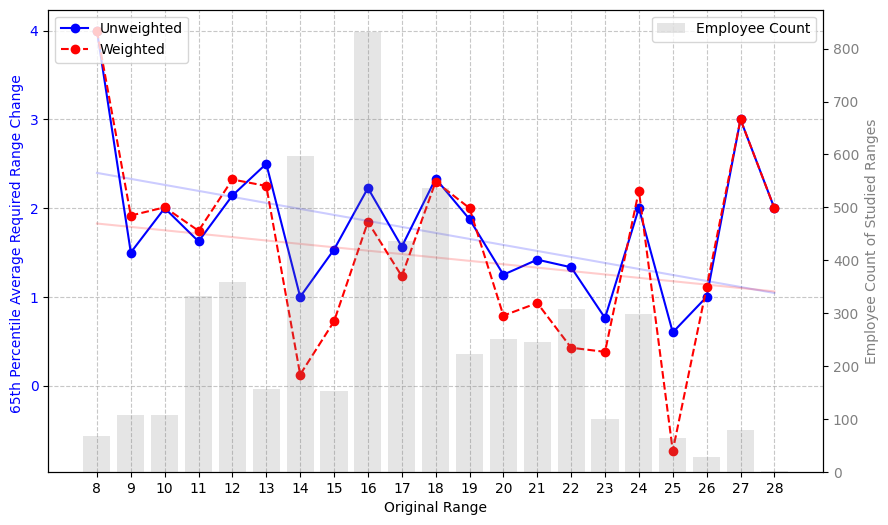

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Unweighted linear regression
X_unweighted = sm.add_constant(df_p65_filtered[['original_range']])
y_unweighted = df_p65_filtered['range_change']
model_unweighted = sm.OLS(y_unweighted, X_unweighted).fit()

# Weighted linear regression
weights = df_p65_filtered['headcount'] + 1e-10
X_weighted = sm.add_constant(df_p65_filtered[['original_range']])
model_weighted = sm.WLS(y_unweighted, X_weighted, weights=weights).fit()

# Define original ranges as categorical values
original_ranges = np.arange(8, 29)

counts = df_p65_filtered.groupby('original_range')['headcount'].sum()

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot line graphs on left y-axis
ax1.plot(original_ranges, unweighted_avg_range_change.values, label='Unweighted', marker='o', color='blue')
ax1.plot(original_ranges, weighted_avg_range_change.values, label='Weighted', linestyle='--', marker='o', color='red')

# Generate x-values for regression lines
x_reg = np.linspace(original_ranges.min(), original_ranges.max(), 100)

# Predict y-values for regression lines
y_unweighted_reg = model_unweighted.params.iloc[0] + model_unweighted.params.iloc[1] * x_reg
y_weighted_reg = model_weighted.params.iloc[0] + model_weighted.params.iloc[1] * x_reg

# Plot regression lines
ax1.plot(x_reg, y_unweighted_reg, linestyle='-', color='blue', alpha=0.2)
ax1.plot(x_reg, y_weighted_reg, linestyle='-', color='red', alpha=0.2)

# Set labels and title
ax1.set_xlabel('Original Range')
ax1.set_ylabel('65th Percentile Average Required Range Change ', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis on right
ax2 = ax1.twinx()

# Plot bar graph on right y-axis
ax2.bar(original_ranges, counts.values, alpha=0.2, color='gray', label='Employee Count')

# Set labels and tick parameters for secondary y-axis
ax2.set_ylabel('Employee Count of Studied Ranges', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Set x-axis ticks to integer values
ax1.set_xticks(original_ranges)

# Add grid for better readability (only on left y-axis)
ax1.grid(True, linestyle='--', alpha=0.7)

# Legend and show plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
